In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/meketref/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time

In [5]:
from pyspark.sql import SparkSession, functions as f

spark = SparkSession.builder\
    .master('local[*]')\
    .appName('WordCloud')\
    .getOrCreate()

23/01/31 16:53:25 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.1.7 instead (on interface enp5s0)
23/01/31 16:53:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/31 16:53:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/01/31 16:53:25 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [6]:
def trata_tweets(df):
    words = df\
        .select(f.explode(f.split(f.lower('_c0'), ' ')).alias('word'))\
        .withColumn('word', f.regexp_replace('word', r'http\S+', ''))\
        .withColumn('word', f.regexp_replace('word', r'@\w+', ''))\
        .withColumn('word', f.regexp_replace('word', 'rt', ''))\
        .na.replace('', None)\
        .na.drop()
    return words

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/home/meketref/Documents/projects/apache-spark/.apache-spark/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/meketref/Documents/projects/apache-spark/.apache-spark/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


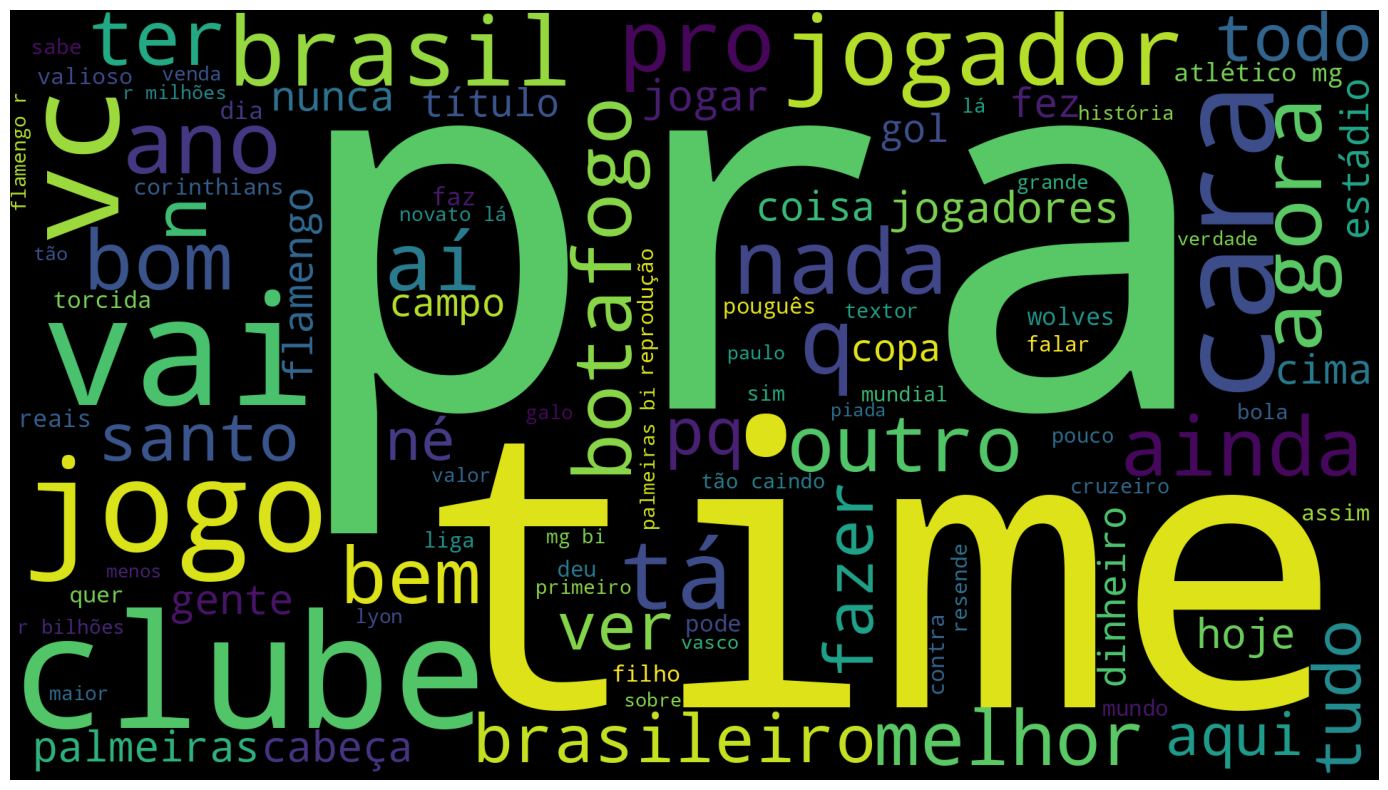

In [10]:
# apenas palavras em portugues
stops = stopwords.words('portuguese')
stops.append('futebol')

plt.figure(figsize=(20, 10))

while True:
    try:
        words = spark.read.csv('./csv', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()

        all_words = ''

        for row in rows:
            all_words = all_words + ' ' + row['word']

        wordcloud = WordCloud(
                        stopwords=stops,
                        background_color='black',
                        width=1920,
                        height=1080,
                        max_words=100
                    ).generate(all_words)

        plt.cla()
        plt.axis('off')
        plt.imshow(wordcloud)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(2)
    
    except KeyboardInterrupt:
        break